In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import glob
import ast

sns.set_context("paper")
sns.set(font_scale = 1.6)
sns.set_style("white", {
    "font.family": "sans-serif",
    "font.serif": ['Helvetica'],
    "font.scale": 2
})
sns.set_style("ticks", {"xtick.major.size": 4,
                        "ytick.major.size": 4})

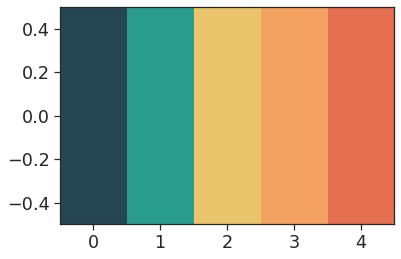

In [2]:
from matplotlib import colors
palette = ['#264653', '#2A9D8F','#E9C46A', '#F4A261', '#E76F51']
cmap = colors.ListedColormap(palette)

plt.imshow(np.arange(len(palette)).reshape(1, -1), aspect='auto', cmap=cmap,origin="lower")
plt.show()

### Single loss

In [7]:
exp = 'transformers/autoencoder_mask9'

training_file = f'/mlodata1/lugeon/eeg_project/results/{exp}/loss.txt'
training_history = pd.read_csv(training_file, sep=' ')
training_history.head(10)

,epoch,training,validation
0,0,1.8985,1.8882
1,1,0.4399,0.3277
2,2,0.3051,0.2915
3,3,0.2819,0.2740
4,4,0.2683,0.2617
5,5,0.2565,0.2501
6,6,0.2447,0.2397
7,7,0.2347,0.2294
8,8,0.2266,0.2239
9,9,0.2196,0.2150


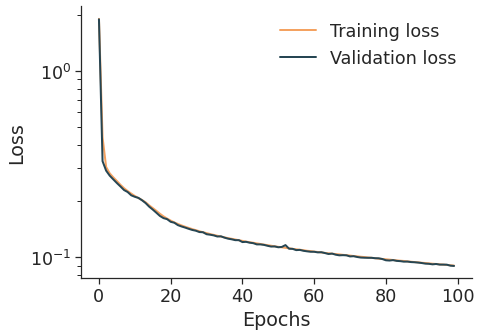

In [5]:
fig, ax = plt.subplots(figsize=(7, 5))

x = training_history.epoch

plt.plot(x, training_history.training, label='Training loss', color=cmap(3), linewidth=2)
plt.plot(x, training_history.validation, label='Validation loss', color=cmap(0), linewidth=2)

plt.legend(frameon=False)

plt.xlabel('Epochs')
plt.ylabel('Loss')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#ax.set_ylim([0, 0.8])
ax.set_yscale('log')

plt.show()

### Adverserial fine-tuning

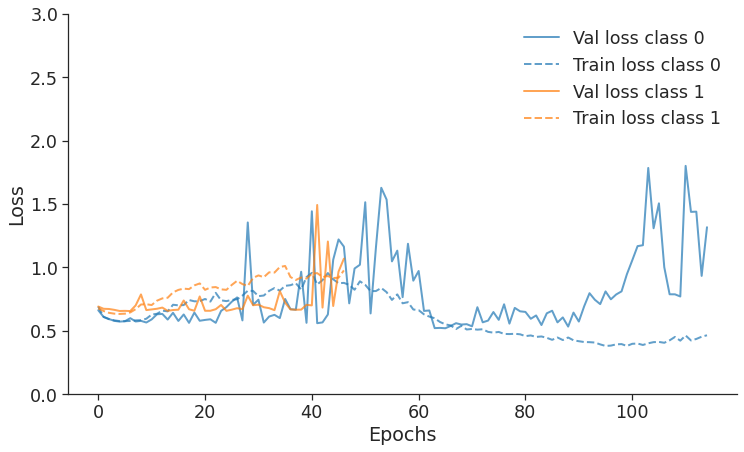

In [6]:
exp = 'loso_ft/autoencoder_newdrop8_adv05'
loss_files = f'/home/lugeon/eeg_project/results/{exp}/*/loss.txt'

df_loss = pd.DataFrame()


for f in glob.glob(loss_files):
    df_sub = pd.read_csv(f, sep=' ', index_col=None)
    df_sub['subject'] = int(f.split('/')[-2])
    df_loss = pd.concat((df_sub, df_loss))
    
    
def split_loss(loss_array):
    return ast.literal_eval(loss_array)

df_loss['val_loss_class'] = df_loss.validation.apply(lambda l: split_loss(l)[0])
df_loss['val_loss_adv'] = df_loss.validation.apply(lambda l: split_loss(l)[1])
df_loss['train_loss_class'] = df_loss.training.apply(lambda l: split_loss(l)[0])
df_loss['train_loss_adv'] = df_loss.training.apply(lambda l: split_loss(l)[1])

sub_cmap = matplotlib.cm.get_cmap('tab10')

fig, ax = plt.subplots(figsize=(12, 7))

for s in df_loss.subject.unique():
    
    df_sub = df_loss[df_loss.subject == s]
    
    x = df_sub.epoch
    
    plt.plot(x, df_sub.val_loss_class, 
             label=f'Val loss class {s}', linewidth=2, c=sub_cmap(s), alpha=0.7)
    
    plt.plot(x, df_sub.train_loss_class, 
             label=f'Train loss class {s}', linewidth=2, c=sub_cmap(s), linestyle='--', alpha=0.7)
    
plt.legend(frameon=False)

plt.xlabel('Epochs')
plt.ylabel('Loss')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_ylim([0, 3])
#ax.set_yscale('log')

plt.show()

### Architecture comparison

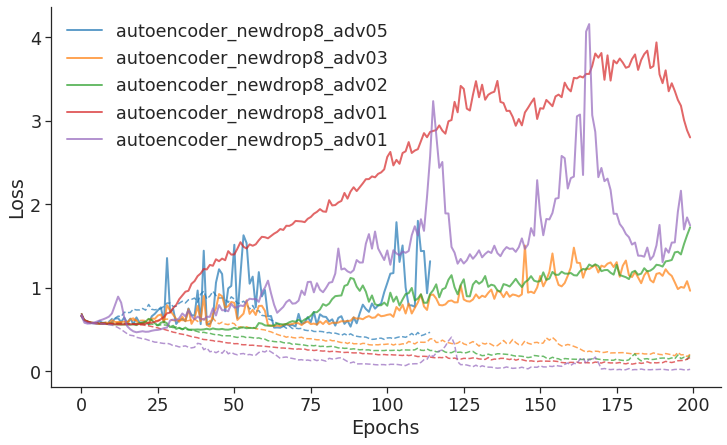

In [20]:
cmap = matplotlib.cm.get_cmap('tab10')
dir = '/home/lugeon/eeg_project/results/loso_ft'
exps = [
    'autoencoder_newdrop5_adv01',
    'autoencoder_newdrop8_adv01',
    'autoencoder_newdrop8_adv02',
    'autoencoder_newdrop8_adv03',
    'autoencoder_newdrop8_adv05'
]

df_loss = pd.DataFrame()
for exp in exps:
    
    training_file = f'{dir}/{exp}/0/loss.txt'
    df_sub = pd.read_csv(training_file, sep=' ', index_col=None)
    df_sub['exp'] = exp
    df_loss = pd.concat((df_sub, df_loss))
    
df_loss['val_loss'] = df_loss.validation.apply(lambda l: split_loss(l)[0])
df_loss['val_loss_adv'] = df_loss.validation.apply(lambda l: split_loss(l)[1])
df_loss['train_loss'] = df_loss.training.apply(lambda l: split_loss(l)[0])
df_loss['train_loss_adv'] = df_loss.training.apply(lambda l: split_loss(l)[1])

sub_cmap = matplotlib.cm.get_cmap('tab10')

fig, ax = plt.subplots(figsize=(12, 7))

for i, e in enumerate(df_loss.exp.unique()):
    
    df_sub = df_loss[df_loss.exp == e]
    x = df_sub.epoch
    
    plt.plot(x, df_sub.val_loss, 
             label=f'{e}', linewidth=2, c=cmap(i), alpha=0.7)
    
    plt.plot(x, df_sub.train_loss, 
             linewidth=1.5, c=cmap(i), alpha=0.7, linestyle='--')
    
    
plt.legend(frameon=False)

plt.xlabel('Epochs')
plt.ylabel('Loss')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#ax.set_ylim([0, 3])
#ax.set_yscale('log')

plt.show()